## Label detection

In [1]:
from __future__ import print_function
from google.cloud import vision

image_uri = 'gs://cloud-samples-data/vision/using_curl/shanghai.jpeg'

client = vision.ImageAnnotatorClient()
image = vision.types.Image()
image.source.image_uri = image_uri

response = client.label_detection(image=image)

print('Labels (and confidence score):')
print('=' * 30)
for label in response.label_annotations:
    print(label.description, '(%.2f%%)' % (label.score*100.))

Labels (and confidence score):
People (95.05%)
Street (89.12%)
Mode of transport (89.09%)
Transport (85.13%)
Vehicle (84.69%)
Snapshot (84.11%)
Urban area (80.29%)
Infrastructure (73.14%)
Road (72.74%)
Pedestrian (68.90%)


## Text detection

In [2]:
from __future__ import print_function
from google.cloud import vision

image_uri = 'gs://cloud-vision-codelab/otter_crossing.jpg'

client = vision.ImageAnnotatorClient()
image = vision.types.Image()
image.source.image_uri = image_uri

response = client.text_detection(image=image)

for text in response.text_annotations:
    print('=' * 30)
    print(text.description)
    vertices = ['(%s,%s)' % (v.x, v.y) for v in text.bounding_poly.vertices]
    print('bounds:', ",".join(vertices))

CAUTION
Otters crossing
for next 6 miles

bounds: (61,243),(251,243),(251,340),(61,340)
CAUTION
bounds: (75,245),(235,243),(235,269),(75,271)
Otters
bounds: (65,296),(140,297),(140,315),(65,314)
crossing
bounds: (151,295),(247,297),(247,318),(151,316)
for
bounds: (61,322),(94,322),(94,340),(61,340)
next
bounds: (106,322),(156,322),(156,340),(106,340)
6
bounds: (167,321),(180,321),(180,339),(167,339)
miles
bounds: (191,321),(251,321),(251,339),(191,339)


## Landmark detection

In [3]:
from google.cloud import vision

image_uri = 'gs://cloud-vision-codelab/eiffel_tower.jpg'

client = vision.ImageAnnotatorClient()
image = vision.types.Image()
image.source.image_uri = image_uri

response = client.landmark_detection(image=image)

for landmark in response.landmark_annotations:
    print('=' * 30)
    print(landmark)

mid: "/g/120xtw6z"
description: "Trocad\303\251ro Gardens"
score: 0.9126492738723755
bounding_poly {
  vertices {
    x: 339
    y: 54
  }
  vertices {
    x: 513
    y: 54
  }
  vertices {
    x: 513
    y: 353
  }
  vertices {
    x: 339
    y: 353
  }
}
locations {
  lat_lng {
    latitude: 48.861596299999995
    longitude: 2.2892823
  }
}

mid: "/m/02j81"
description: "Eiffel Tower"
score: 0.523098349571228
bounding_poly {
  vertices {
    x: 440
    y: 191
  }
  vertices {
    x: 531
    y: 191
  }
  vertices {
    x: 531
    y: 299
  }
  vertices {
    x: 440
    y: 299
  }
}
locations {
  lat_lng {
    latitude: 48.858461
    longitude: 2.294351
  }
}



## Emotional face detection

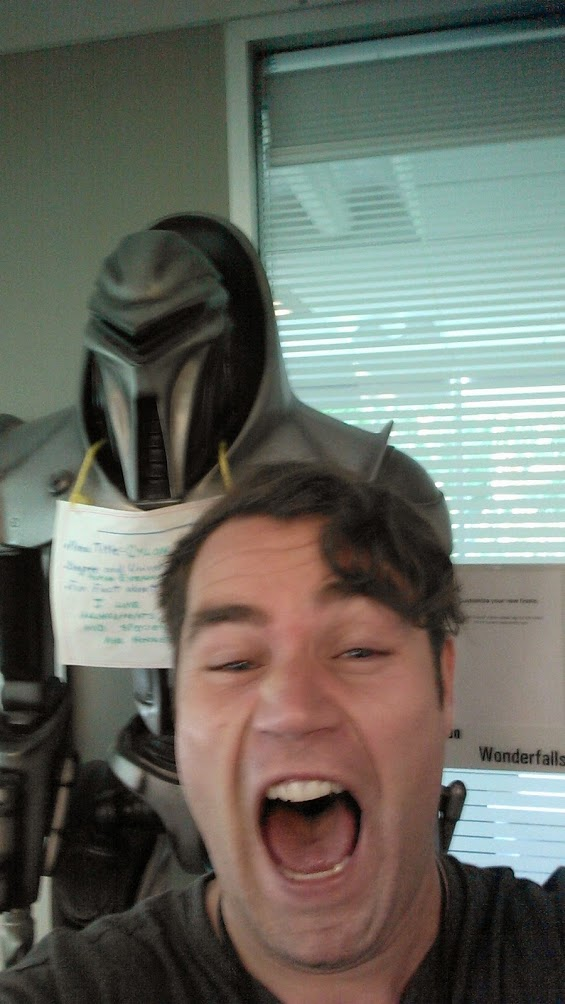

File: face_surprise.jpg
Face surprised: LIKELY
Face bounds: (93,425),(520,425),(520,922),(93,922)


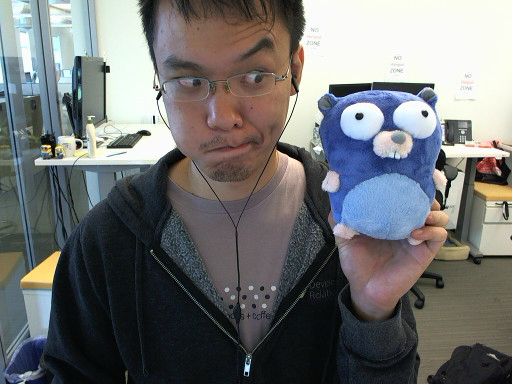

File: face_no_surprise.png
Face surprised: VERY_UNLIKELY
Face bounds: (120,0),(334,0),(334,198),(120,198)


In [11]:
from __future__ import print_function
from google.cloud import vision
from IPython.core.display import Image, display

uri_base = 'gs://cloud-vision-codelab'
pics = ('face_surprise.jpg', 'face_no_surprise.png')

client = vision.ImageAnnotatorClient()
image = vision.types.Image()

for pic in pics:
    image.source.image_uri = '%s/%s' % (uri_base, pic)
    response = client.face_detection(image=image)
    display(Image('%s/%s' % ('https://storage.googleapis.com/cloud-vision-codelab', pic)))

    print('=' * 30)
    print('File:', pic)
    for face in response.face_annotations:
        likelihood = vision.enums.Likelihood(face.surprise_likelihood)
        vertices = ['(%s,%s)' % (v.x, v.y) for v in face.bounding_poly.vertices]
        print('Face surprised:', likelihood.name)
        print('Face bounds:', ",".join(vertices))

In [ ]:
def detect_faces(path):
    """Detects faces in an image."""
    from google.cloud import vision
    import io
    from IPython.core.display import Image, display
    
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
    
    display(Image(path, width=300))

    image = vision.types.Image(content=content)

    response = client.face_detection(image=image)
    faces = response.face_annotations

    # Names of likelihood from google.cloud.vision.enums
    likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                       'LIKELY', 'VERY_LIKELY')
    print('Faces:')

    for face in faces:
        print('anger: {}'.format(likelihood_name[face.anger_likelihood]))
        print('joy: {}'.format(likelihood_name[face.joy_likelihood]))
        print('surprise: {}'.format(likelihood_name[face.surprise_likelihood]))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in face.bounding_poly.vertices])

        print('face bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(\
            '{}\nFor more info on error messages, check: '\
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

import glob

for pic in glob.glob('PATH-TO-FOLDER-AND-MASK'):
    detect_faces(pic)